<h3>收集各地點座標</h3>

In [3]:
positions = {
    "Taipei" : (25.048017041403916, 121.51707620800926),
    "Hsinchu" : (24.801652907699495, 120.97169549677),
    "Taichung" : (24.137318270848155, 120.68698605413316),
    "Douliu" : (23.711872089285173, 120.54094074396058),
    "KaoHsiung" : (22.63946265246169, 120.30258299899556),
    "Yuli" : (23.33207736143637, 121.31570525080193),
    "Zhiben" : (22.7090266537187, 121.05343548594232)
}

<h3>計算距離(Harvesine)</h3>

In [4]:
from haversine import haversine
import pandas as pd

In [5]:
def compute_distance(position1, position2):
    if position1 == position2:
        return 0.0
    coord1 = positions[position1]
    coord2 = positions[position2]
    # print(coord1, coord2)
    return haversine(coord1, coord2)

In [6]:
distance_df = pd.DataFrame(index = positions.keys(), columns = positions.keys())
distance_df

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hsinchu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taichung,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Douliu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KaoHsiung,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yuli,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhiben,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for po1 in distance_df.index:
    for po2 in distance_df.columns:
        distance_df.loc[po1, po2] = compute_distance(po1, po2)
        print(f"{po1} - {po2} : {distance_df.loc[po1, po2]} km")

Taipei - Taipei : 0.0 km
Taipei - Hsinchu : 61.44052882946202 km
Taipei - Taichung : 131.52371969014192 km
Taipei - Douliu : 178.45706186237535 km
Taipei - KaoHsiung : 294.9248886823142 km
Taipei - Yuli : 191.894054589905 km
Taipei - Zhiben : 264.3211305755053 km
Hsinchu - Taipei : 61.44052882946202 km
Hsinchu - Hsinchu : 0.0 km
Hsinchu - Taichung : 79.29164093079366 km
Hsinchu - Douliu : 128.8063148977543 km
Hsinchu - KaoHsiung : 249.88619168400078 km
Hsinchu - Yuli : 167.10018293101584 km
Hsinchu - Zhiben : 232.83837891137017 km
Taichung - Taipei : 131.52371969014192 km
Taichung - Hsinchu : 79.29164093079366 km
Taichung - Taichung : 0.0 km
Taichung - Douliu : 49.58175970098568 km
Taichung - KaoHsiung : 171.11189743246686 km
Taichung - Yuli : 110.05795558984175 km
Taichung - Zhiben : 163.16047034141144 km
Douliu - Taipei : 178.45706186237535 km
Douliu - Hsinchu : 128.8063148977543 km
Douliu - Taichung : 49.58175970098568 km
Douliu - Douliu : 0.0 km
Douliu - KaoHsiung : 121.71035049103

In [8]:
distance_df

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,0.0,61.440529,131.52372,178.457062,294.924889,191.894055,264.321131
Hsinchu,61.440529,0.0,79.291641,128.806315,249.886192,167.100183,232.838379
Taichung,131.52372,79.291641,0.0,49.58176,171.111897,110.057956,163.16047
Douliu,178.457062,128.806315,49.58176,0.0,121.71035,89.571739,123.198191
KaoHsiung,294.924889,249.886192,171.111897,121.71035,0.0,129.177461,77.425468
Yuli,191.894055,167.100183,110.057956,89.571739,129.177461,0.0,74.297739
Zhiben,264.321131,232.838379,163.16047,123.198191,77.425468,74.297739,0.0


<h3>MDS降維</h3>

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [10]:
mds = MDS(n_components=2, random_state=23, normalized_stress=False, dissimilarity='precomputed')
mds_results = mds.fit_transform(distance_df)

<h3>計算距離(geodestic)</h3>

In [11]:
from geopy.distance import geodesic

In [12]:
distance_df_geo = pd.DataFrame(index = positions.keys(), columns = positions.keys())
distance_df_geo

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hsinchu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taichung,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Douliu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KaoHsiung,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yuli,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhiben,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def compute_geo_distance(position1, position2):
    if position1 == position2:
        return 0.0
    coord1 = positions[position1]
    coord2 = positions[position2]
    # print(coord1, coord2)
    return geodesic(coord1, coord2).kilometers

In [14]:
for po1 in distance_df_geo.index:
    for po2 in distance_df_geo.columns:
        distance_df_geo.loc[po1, po2] = compute_geo_distance(po1, po2)
        print(f"{po1} - {po2} : {distance_df_geo.loc[po1, po2]} km")

Taipei - Taipei : 0.0 km
Taipei - Hsinchu : 61.47857779052143 km
Taipei - Taichung : 131.31498875346105 km
Taipei - Douliu : 178.07043838816253 km
Taipei - KaoHsiung : 294.0516030822179 km
Taipei - Yuli : 191.1571671682441 km
Taipei - Zhiben : 263.3260610553931 km
Hsinchu - Taipei : 61.47857779052143 km
Hsinchu - Hsinchu : 0.0 km
Hsinchu - Taichung : 79.0433748421294 km
Hsinchu - Douliu : 128.38741504943894 km
Hsinchu - KaoHsiung : 249.00032911126922 km
Hsinchu - Yuli : 166.486158752366 km
Hsinchu - Zhiben : 231.91809002177982 km
Taichung - Taipei : 131.31498875346105 km
Taichung - Hsinchu : 79.0433748421294 km
Taichung - Taichung : 0.0 km
Taichung - Douliu : 49.41147120859417 km
Taichung - KaoHsiung : 170.47723702624373 km
Taichung - Yuli : 109.83151626679432 km
Taichung - Zhiben : 162.5559448829922 km
Douliu - Taipei : 178.07043838816253 km
Douliu - Hsinchu : 128.38741504943894 km
Douliu - Taichung : 49.41147120859417 km
Douliu - Douliu : 0.0 km
Douliu - KaoHsiung : 121.2470867617947

In [15]:
distance_df_geo

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,0.0,61.478578,131.314989,178.070438,294.051603,191.157167,263.326061
Hsinchu,61.478578,0.0,79.043375,128.387415,249.000329,166.486159,231.91809
Taichung,131.314989,79.043375,0.0,49.411471,170.477237,109.831516,162.555945
Douliu,178.070438,128.387415,49.411471,0.0,121.247087,89.607683,122.828247
KaoHsiung,294.051603,249.000329,170.477237,121.247087,0.0,129.127334,77.546276
Yuli,191.157167,166.486159,109.831516,89.607683,129.127334,0.0,74.051808
Zhiben,263.326061,231.91809,162.555945,122.828247,77.546276,74.051808,0.0


<h3>MDS降維</h3>

In [16]:
mds_geo = MDS(n_components=2, random_state=23, normalized_stress=False, dissimilarity='precomputed')
mds_results_geo = mds_geo.fit_transform(distance_df_geo)

<h3>使用Matplotlib繪圖(harvesine)</h3>

In [19]:
import numpy as np

In [20]:
names = np.array(list(distance_df.index))

In [21]:
print(mds_results)

[[ 154.98670748   -2.74285014]
 [ 107.40669809  -40.52912336]
 [  28.24661457  -37.11828821]
 [ -21.010599    -31.68677392]
 [-140.00890829   -6.54068755]
 [ -27.65316549   57.6447873 ]
 [-101.96734735   60.97293588]]


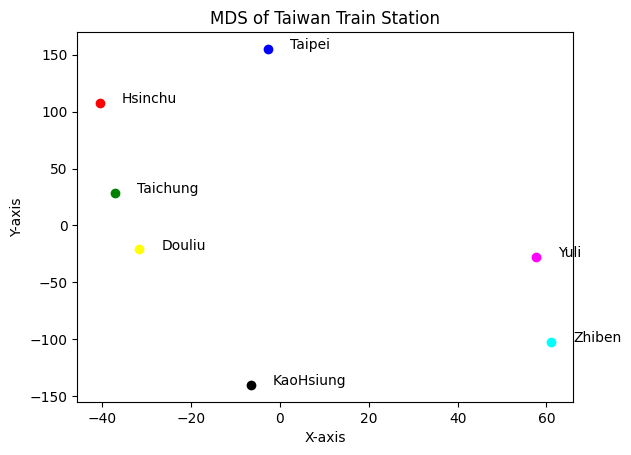

In [22]:
colors = ['blue', 'red', 'green', 'yellow', 'black', 'magenta', 'cyan']

for i in range(len(positions)):
    loc_draw = mds_results
    x = mds_results[i][1]
    y = mds_results[i][0]
    
    plt.scatter(x, y, c=colors[i], label=names[i])
    plt.text(x+5, y, names[i])

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("MDS of Taiwan Train Station")
plt.show()

<h3>使用Matplotlib繪圖(geodestic)</h3>

In [23]:
print(mds_results_geo)

[[ 154.54417654    0.18679564]
 [ 107.66653321  -38.49398091]
 [  28.70472925  -36.59738348]
 [ -20.47509571  -32.10180435]
 [-139.45501767   -9.21806885]
 [ -28.43254715   57.15917122]
 [-102.55277847   59.06527074]]


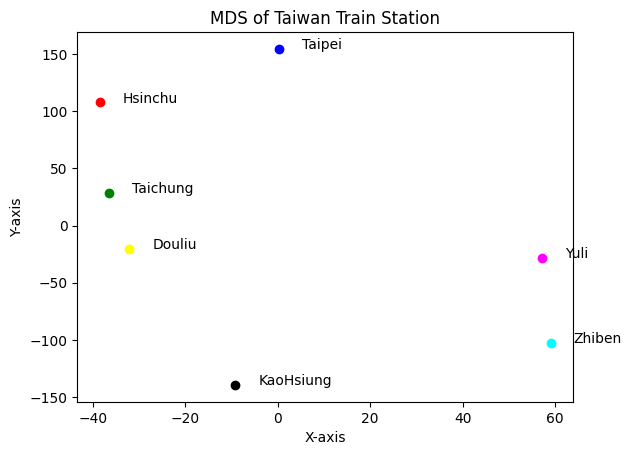

In [24]:
colors = ['blue', 'red', 'green', 'yellow', 'black', 'magenta', 'cyan']

for i in range(len(mds_results_geo)):
    loc_draw = mds_results_geo
    x = mds_results_geo[i][1]
    y = mds_results_geo[i][0]
    
    plt.scatter(x, y, c=colors[i], label=names[i])
    plt.text(x+5, y, names[i])

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("MDS of Taiwan Train Station")
plt.show()

<h3>計算各點降維後的距離(harvesine)</h3>

In [25]:
mds_results

array([[ 154.98670748,   -2.74285014],
       [ 107.40669809,  -40.52912336],
       [  28.24661457,  -37.11828821],
       [ -21.010599  ,  -31.68677392],
       [-140.00890829,   -6.54068755],
       [ -27.65316549,   57.6447873 ],
       [-101.96734735,   60.97293588]])

In [26]:
mds_distances = np.linalg.norm(mds_results[:, np.newaxis] - mds_results[np.newaxis, :], axis=2).round(2)

In [27]:
mds_df = pd.DataFrame(mds_distances, columns = names, index = names)
mds_df

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,0.00,60.76,131.32,178.36,295.02,192.36,264.74
Hsinchu,60.76,0.00,79.23,128.72,249.74,166.97,232.68
Taichung,131.32,79.23,0.00,49.56,171.01,110.02,163.03
Douliu,178.36,128.72,49.56,0.00,121.63,89.58,123.04
KaoHsiung,295.02,249.74,171.01,121.63,0.00,129.40,77.49
Yuli,192.36,166.97,110.02,89.58,129.40,0.00,74.39
Zhiben,264.74,232.68,163.03,123.04,77.49,74.39,0.00


<h3>計算各點降維後的距離(geodestic)</h3>

In [28]:
mds_results_geo

array([[ 154.54417654,    0.18679564],
       [ 107.66653321,  -38.49398091],
       [  28.70472925,  -36.59738348],
       [ -20.47509571,  -32.10180435],
       [-139.45501767,   -9.21806885],
       [ -28.43254715,   57.15917122],
       [-102.55277847,   59.06527074]])

In [29]:
mds_results_geo = np.linalg.norm(mds_results_geo[:, np.newaxis] - mds_results_geo[np.newaxis, :], axis=2).round(2)
mds_df_geo = pd.DataFrame(mds_results_geo, columns = names, index = names)
mds_df_geo

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,0.00,60.78,131.11,177.97,294.15,191.64,263.75
Hsinchu,60.78,0.00,78.98,128.30,248.85,166.35,231.75
Taichung,131.11,78.98,0.00,49.38,170.37,109.80,162.42
Douliu,177.97,128.30,49.38,0.00,121.16,89.61,122.67
KaoHsiung,294.15,248.85,170.37,121.16,0.00,129.35,77.62
Yuli,191.64,166.35,109.80,89.61,129.35,0.00,74.14
Zhiben,263.75,231.75,162.42,122.67,77.62,74.14,0.00


<h3>比較兩個距離取法的差異</h3>

In [31]:
distance_df.subtract(distance_df_geo)

,Taipei,Hsinchu,Taichung,Douliu,KaoHsiung,Yuli,Zhiben
Taipei,0.0,-0.038049,0.208731,0.386623,0.873286,0.736887,0.99507
Hsinchu,-0.038049,0.0,0.248266,0.4189,0.885863,0.614024,0.920289
Taichung,0.208731,0.248266,0.0,0.170288,0.63466,0.226439,0.604525
Douliu,0.386623,0.4189,0.170288,0.0,0.463264,-0.035944,0.369944
KaoHsiung,0.873286,0.885863,0.63466,0.463264,0.0,0.050126,-0.120808
Yuli,0.736887,0.614024,0.226439,-0.035944,0.050126,0.0,0.245931
Zhiben,0.99507,0.920289,0.604525,0.369944,-0.120808,0.245931,0.0
